In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import os

In [ ]:
#Dogs Vs Cats Kaggle Dataset. This model uses Image Data Generator to preprocess the images. We also use CNN Chunks to focus on the ROI and find ways to improve accuracy of model.

In [ ]:
os.environ['KAGGLE_CONFIG_DIR']='/content/'

In [ ]:
# Multiple Convolutions in a same chunk helps when categories are very same and same padding is done to retain some information and improve model performance

In [ ]:
!kaggle competitions download -c dogs-vs-cats

100% 809M/812M [00:09<00:00, 70.3MB/s]
100% 812M/812M [00:09<00:00, 86.0MB/s]


In [ ]:
#Unziping all zip files
! unzip -q dogs-vs-cats.zip

In [ ]:
!unzip -q train.zip

In [ ]:
#Image Data Generator requires folder structure
# Requires you to have a folder structure (but only if you flow_from_directory)
# flow_from_dataframe : that your information is stored in a df
# What informations ? Images and their corresponding labels

# filename    | label
# dog.001.jpg | dog
# cat.007.jpg | cat


In [ ]:
#Creating DataFrame
data = pd.DataFrame(columns =['filename','labels'])
#copying all files into data['filename']
data['filename']= os.listdir('train/')
data['labels']= None

In [ ]:
data.sample(5)

,filename,labels
24408,dog.8471.jpg,None
7007,dog.10094.jpg,None
17010,dog.5660.jpg,None
5255,cat.12152.jpg,None
12898,cat.46.jpg,None


In [ ]:
data['labels']= data['filename'].str.split('.',expand = True)[0]
data.sample(5)

,filename,labels
24424,dog.4860.jpg,dog
2843,dog.3756.jpg,dog
3575,cat.1266.jpg,cat
13369,cat.2099.jpg,cat
2637,cat.1598.jpg,cat


In [ ]:
#Creating IDG
idg = tf.keras.preprocessing.image.ImageDataGenerator(rescale = 1/255.0, validation_split=0.1)

In [ ]:
#Training IDG
batch_size = 256
train_idg = idg.flow_from_dataframe(dataframe=data,directory='train/',
                                    x_col='filename',y_col='labels',target_size=(300,300),
                                    batch_size=batch_size,subset='training')

Found 22500 validated image filenames belonging to 2 classes.


In [ ]:
#validation IDG
val_idg = idg.flow_from_dataframe(dataframe=data,directory='train/',
                                  target_size=(300,300),x_col='filename',y_col='labels',
                                  batch_size=batch_size,subset='validation')

Found 2500 validated image filenames belonging to 2 classes.


In [ ]:
#del model

In [ ]:
from warnings import filters
#Model Creation
model = tf.keras.models.Sequential()
#Input Layer
model.add(tf.keras.layers.Input(shape=(300,300,3),name='InputLayer'))
#CNN CHUNKS:
# 1st Chunk
#filters
model.add(tf.keras.layers.Conv2D(filters=64,kernel_size=(3,3),strides=(1,1),
                                 activation = tf.keras.activations.relu,padding ='valid',
                                 name='Conv1'))
#image_size= (298,298,32)
#MaxPool
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2),strides=(2,2),name='MaxPool1'))
#image_size =(149,149,32)

# 2nd chunk
#filters
model.add(tf.keras.layers.Conv2D(filters=64,kernel_size=(3,3),strides=(1,1),
                                 activation = tf.keras.activations.relu,padding ='valid',
                                 name='Conv2'))
#image_size= (147,147,64)
#MaxPool
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2),strides=(2,2),name='MaxPool2'))
# image_size=(73, 73, 64)

# 3rd Chunk
model.add (tf.keras.layers.Conv2D(filters=64, kernel_size=(3,3), strides=(1,1),
                                  activation=tf.keras.activations.relu,
                                  padding="valid", name="Conv3"))
# (71, 71, 64)
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2), strides=(2,2), name="MaxPool3"))
# (35, 35, 64)

#4th Chunk
#filter
model.add(tf.keras.layers.Conv2D(filters=64,kernel_size=(3,3), strides =(1,1),
                                 activation = tf.keras.activations.relu ,
                                 padding= 'valid',name='Conv4'))
#image_size=(33,33,64)
#MaxPool
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2), strides=(2,2), name='MaxPool4'))
#image_size=(16,16,64)

#Flatten Layer
model.add(tf.keras.layers.Flatten(name="Flat"))
#Hidden Layer
model.add(tf.keras.layers.Dense(64, activation=tf.keras.activations.relu, name="Dense"))
#OutputLayer
model.add(tf.keras.layers.Dense(2, activation=tf.keras.activations.softmax, name="Output"))

#Model Summary
model.summary()

In [ ]:
from warnings import filters
#Same Padding

#Model Creation
model = tf.keras.models.Sequential()
#Input Layer
model.add(tf.keras.layers.Input(shape=(300,300,3),name='InputLayer'))
#CNN CHUNKS:

# 1st Chunk
#filters
model.add(tf.keras.layers.Conv2D(filters=64,kernel_size=(3,3),strides=(1,1),
                                 activation = tf.keras.activations.relu,padding='same',
                                 name='Conv1'))

#filters
model.add(tf.keras.layers.Conv2D(filters=64,kernel_size=(3,3),strides=(1,1),
                                 activation = tf.keras.activations.relu,padding ='same',
                                 name='Conv2'))
#MaxPool
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2),strides=(2,2),name='MaxPool1'))
#image_size =(149,149,32)

# 2nd chunk
#filters
model.add(tf.keras.layers.Conv2D(filters=64,kernel_size=(3,3),strides=(1,1),
                                 activation = tf.keras.activations.relu,padding ='same',
                                 name='Conv3'))
#filters
model.add (tf.keras.layers.Conv2D(filters=64, kernel_size=(3,3), strides=(1,1),
                                  activation=tf.keras.activations.relu,
                                  padding="same", name="Conv4"))
#MaxPool
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2),strides=(2,2),name='MaxPool2'))


#Flatten Layer
model.add(tf.keras.layers.Flatten(name="Flat"))
#Hidden Layer
model.add(tf.keras.layers.Dense(64, activation=tf.keras.activations.relu, name="Dense"))
#OutputLayer
model.add(tf.keras.layers.Dense(2, activation=tf.keras.activations.softmax, name="Output"))

#Model Summary
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Conv1 (Conv2D)              (None, 300, 300, 64)      1792      
                                                                 
 Conv2 (Conv2D)              (None, 300, 300, 64)      36928     
                                                                 
 MaxPool1 (MaxPooling2D)     (None, 150, 150, 64)      0         
                                                                 
 Conv3 (Conv2D)              (None, 150, 150, 64)      36928     
                                                                 
 Conv4 (Conv2D)              (None, 150, 150, 64)      36928     
                                                                 
 MaxPool2 (MaxPooling2D)     (None, 75, 75, 64)        0         
                                                                 
 Flat (Flatten)              (None, 360000)           

In [ ]:
#Model Compilation
model.compile(optimizer=tf.keras.optimizers.SGD(),
              loss=tf.keras.losses.categorical_crossentropy,
              metrics=["acc"])

In [ ]:
#Model Fitting
model.fit(train_idg, batch_size= batch_size , epochs= 15 , validation_data = val_idg)

Epoch 1/15


ResourceExhaustedError: ignored

In [ ]:
'''
train_acc_m1= model.history.history['acc']
val_acc_m1 = model.history.history['val_acc']
'''

In [ ]:
'''train_acc_m2= model.history.history['acc']
val_acc_m2 = model.history.history['val_acc']'''

In [ ]:
train_acc_m3= model.history.history['acc']
val_acc_m3 = model.history.history['val_acc']

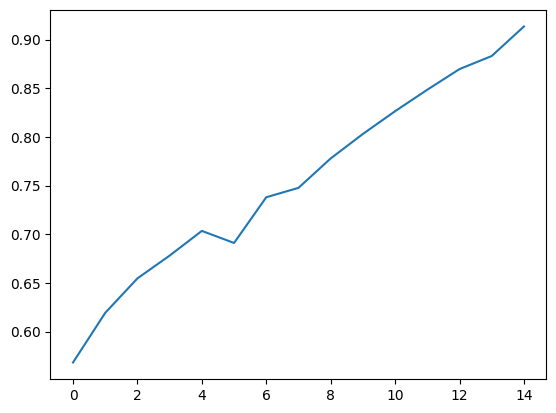

In [ ]:
plt.plot(train_acc_m3, label='Training Acc')

Text(0.5, 1.0, 'Accuracy of Model')

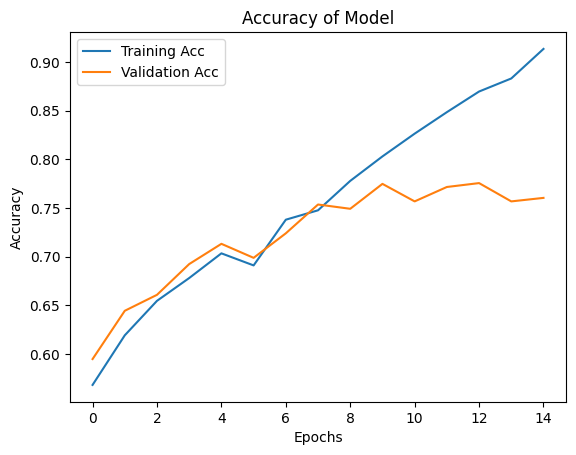

In [ ]:
#Plotting Acc vs Val Graph
plt.plot(model.history.history['acc'],label='Training Acc')
plt.plot(model.history.history['val_acc'],label='Validation Acc')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title("Accuracy of Model")

Text(0.5, 1.0, 'Losses of Model')

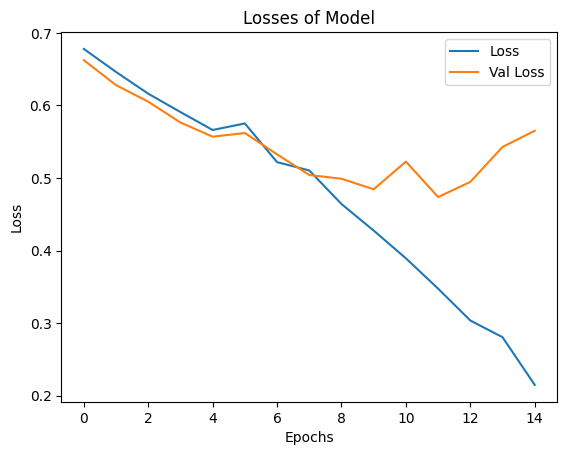

In [ ]:
#Plotting Losses (In DL We focus on Losses over accuracy)
plt.plot(model.history.history['loss'],label='Loss')
plt.plot(model.history.history['val_loss'],label='Val Loss')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Losses of Model')

In [ ]:
#plotting all model training accuracy
'''
plt.plot(train_acc_m1['acc'],label='train_acc_m1')
plt.plot(train_acc_m2['acc'],label='train_acc_m2')
plt.plot(train_acc_m3['acc'],label='train_acc_m3')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title("Accuracy of Model")
'''

In [ ]:
#plotting all model validation accuracy
'''
plt.plot(val_acc_m1['val'],label='val_acc_m1')
plt.plot(val_acc_m2['val'],label='val_acc_m2')
plt.plot(val_acc_m3['val'],label='val_acc_m3')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title("Accuracy of Model")
'''

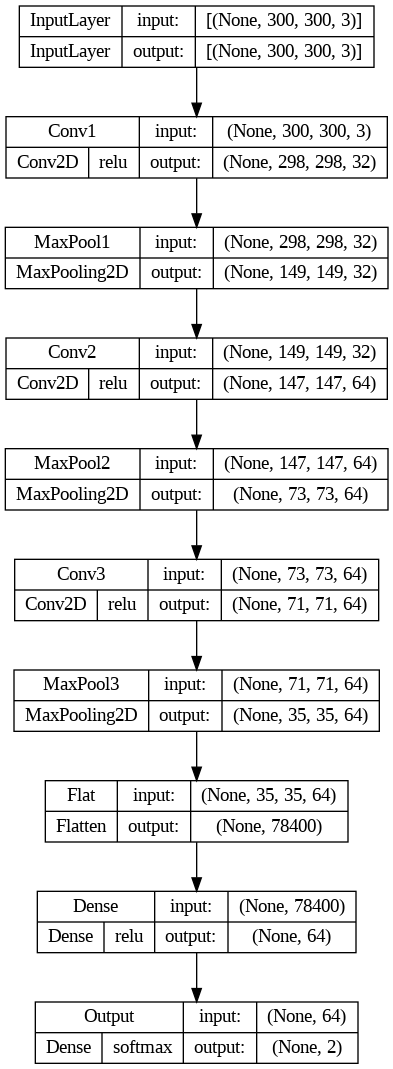

In [ ]:
tf.keras.utils.plot_model(model,show_shapes=True,show_layer_activations=True)

In [ ]:
# cnn cant do categorization dense does it